# Spark Foundation Internship Task-2

Problem statement: Predict optimum number of cluster and represent it visually.

In [3]:
#loding dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use('ggplot')

In [4]:
#loading the dataset
iris=sns.load_dataset('iris')

In [5]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
#segregate the independent and dependent features
X=iris.drop(['species'],axis=1)
X=X.values

Model Training

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
for k in range(1,11):
    kmean = KMeans(n_clusters=k,init='k-means++')
    kmean.fit(X)
    wcss.append(kmean.inertia_)

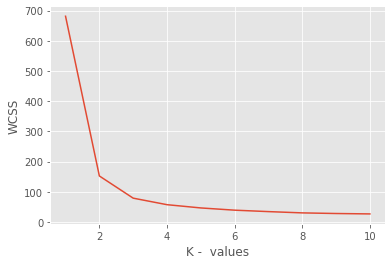

In [13]:
# To find k value we we will plot elbow curve
plt.plot(range(1,11),wcss)
plt.xlabel('K -  values')
plt.ylabel('WCSS')
plt.show()

We can take k=3

In [14]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [15]:
y_label = kmeans.fit_predict(X)

Visualise cluster

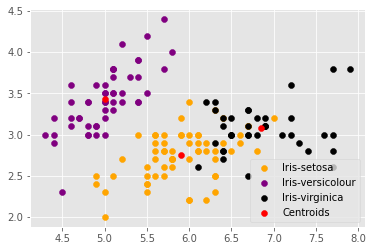

In [18]:
#Visualising the cluster
plt.scatter(X[y_label == 0, 0], X[y_label == 0, 1], 
             c = 'orange', label = 'Iris-setosa')
plt.scatter(X[y_label == 1, 0], X[y_label == 1, 1], 
             c = 'purple', label = 'Iris-versicolour')
plt.scatter(X[y_label == 2, 0], X[y_label == 2, 1],
             c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
             c = 'red', label = 'Centroids')
plt.legend()
plt.show()